In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
# Read the csv file
data_file = r'C:\Users\Gebruiker\Downloads\data_a.csv'
data = pd.read_csv(data_file)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78192 entries, 0 to 78191
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        78192 non-null  int64  
 1   To rent                           74200 non-null  object 
 2   To sell                           74200 non-null  object 
 3   Price                             74200 non-null  float64
 4   Number of rooms                   73277 non-null  float64
 5   Living Area                       62305 non-null  float64
 6   Fully equipped kitchen            47940 non-null  object 
 7   Furnished                         51057 non-null  object 
 8   Open fire                         78192 non-null  bool   
 9   Terrace                           78192 non-null  bool   
 10  Area of the terrace               61406 non-null  float64
 11  Garden                            78192 non-null  bool   
 12  Area

Data cleaning 

In [78]:
# Remove duplicates
data = data.drop_duplicates()
print(data)

       Unnamed: 0 To rent To sell     Price  Number of rooms  Living Area  \
0         1610665    True   False     485.0              1.0         40.0   
1         2718948    True   False     790.0              2.0        140.0   
2         3229637    True   False     900.0              3.0        103.0   
3         3860205    True   False     520.0              2.0         50.0   
4         4141598    True   False     760.0              1.0         55.0   
...           ...     ...     ...       ...              ...          ...   
78187    10316113   False    True  349000.0              4.0          NaN   
78188    10316130    True   False     590.0              1.0          NaN   
78189    10316135    True   False     595.0              1.0          NaN   
78190    10316134    True   False    1150.0              3.0        800.0   
78191    10316136    True   False    1590.0              3.0        100.0   

      Fully equipped kitchen Furnished  Open fire  Terrace  \
0            

In [79]:
#remove white spaces
data = data.replace('\s+', '', regex=True)
print(data)

       Unnamed: 0 To rent To sell     Price  Number of rooms  Living Area  \
0         1610665    True   False     485.0              1.0         40.0   
1         2718948    True   False     790.0              2.0        140.0   
2         3229637    True   False     900.0              3.0        103.0   
3         3860205    True   False     520.0              2.0         50.0   
4         4141598    True   False     760.0              1.0         55.0   
...           ...     ...     ...       ...              ...          ...   
78187    10316113   False    True  349000.0              4.0          NaN   
78188    10316130    True   False     590.0              1.0          NaN   
78189    10316135    True   False     595.0              1.0          NaN   
78190    10316134    True   False    1150.0              3.0        800.0   
78191    10316136    True   False    1590.0              3.0        100.0   

      Fully equipped kitchen Furnished  Open fire  Terrace  \
0            

In [80]:
#remove all the errors
data = data.dropna()
print(data)

       Unnamed: 0 To rent To sell     Price  Number of rooms  Living Area  \
8         5701118    True   False     900.0              3.0        170.0   
126       9057996    True   False    1100.0              3.0        125.0   
131       9090035    True   False    1200.0              3.0        185.0   
167       9391563    True   False    5900.0              7.0        700.0   
210       9572169    True   False    1980.0              5.0        180.0   
...           ...     ...     ...       ...              ...          ...   
78105    10316059   False    True  245000.0              5.0        180.0   
78112    10316058   False    True  185000.0              3.0        120.0   
78121    10316056   False    True  245000.0              5.0        180.0   
78144    10238428   False    True  360000.0              4.0        180.0   
78158    10316110   False    True  325000.0              2.0        109.0   

      Fully equipped kitchen Furnished  Open fire  Terrace  \
8            

Data Analysis

In [81]:
# row and columns
print(data.shape)

(6574, 20)


In [82]:
#correlation between price and other variables
correlations = data.corr(numeric_only=True)['Price']
print(correlations)

Unnamed: 0                          0.035284
Price                               1.000000
Number of rooms                     0.164824
Living Area                         0.087490
Open fire                           0.090756
Terrace                             0.062777
Area of the terrace                 0.059915
Garden                              0.056397
Area of the garden                 -0.022983
Surface of the land                -0.027558
Surface area of the plot of land   -0.027558
Number of facades                   0.183160
Swimming pool                       0.066521
zipcode                            -0.123268
Name: Price, dtype: float64


In [83]:
#correlation of the variables
corr= data.corr(numeric_only=True)
# Print the correlation matrix
print(corr)

                                  Unnamed: 0     Price  Number of rooms  \
Unnamed: 0                          1.000000  0.035284        -0.060060   
Price                               0.035284  1.000000         0.164824   
Number of rooms                    -0.060060  0.164824         1.000000   
Living Area                        -0.091395  0.087490         0.468129   
Open fire                          -0.020452  0.090756         0.077508   
Terrace                            -0.016156  0.062777         0.037701   
Area of the terrace                -0.021624  0.059915         0.139967   
Garden                              0.023089  0.056397         0.031952   
Area of the garden                 -0.021138 -0.022983         0.141204   
Surface of the land                -0.043351 -0.027558         0.094974   
Surface area of the plot of land   -0.043351 -0.027558         0.094974   
Number of facades                  -0.006288  0.183160         0.122345   
Swimming pool            

In [84]:
# qualitative and quantitative variables and change into numeric value
quant_vars = data.select_dtypes(include=['float64', 'int64'])
qual_vars = data.select_dtypes(exclude=['float64', 'int64'])
print(f'Number of quantitative variables: {quant_vars.shape[1]}')
print(f'Number of qualitative variables: {qual_vars.shape[1]}')

Number of quantitative variables: 10
Number of qualitative variables: 10


In [85]:
#missing values
missing_values = data.isna().mean() * 100
print(missing_values)

Unnamed: 0                          0.0
To rent                             0.0
To sell                             0.0
Price                               0.0
Number of rooms                     0.0
Living Area                         0.0
Fully equipped kitchen              0.0
Furnished                           0.0
Open fire                           0.0
Terrace                             0.0
Area of the terrace                 0.0
Garden                              0.0
Area of the garden                  0.0
Surface of the land                 0.0
Surface area of the plot of land    0.0
Number of facades                   0.0
Swimming pool                       0.0
State of the building               0.0
zipcode                             0.0
type                                0.0
dtype: float64


Data visualization

In [86]:
# Calculate average price
average_price = data['Price'].mean()
print("Average price: ", average_price)


Average price:  311845.9815941588


In [87]:
# Calculate median price
median_price = data['Price'].median()
print("Median price: ", median_price)

Median price:  285000.0


In [88]:
# Calculate price per square meter
data['price_per_sq_m'] = data['Price'] / data['Surface of the land']
print("Price per square meter: ", data['price_per_sq_m'])

Price per square meter:  8          18.000000
126      1100.000000
131         3.333333
167         5.900000
210        33.000000
            ...     
78105    1580.645161
78112    1480.000000
78121    1580.645161
78144     541.353383
78158     148.877691
Name: price_per_sq_m, Length: 6574, dtype: float64


In [89]:
data["zipcode"] = data["zipcode"].astype(str)

# Create a new column named 'region' in the dataframe
df = data["region"] = ""
# Use the apply() function to iterate over the 'zipcode' column
df = data["region"] = data["zipcode"].apply(lambda x: "Flanders" if x.startswith(("2", "3", "9")) else (
        "Wallonia" if x.startswith(("4", "5", "6", "7")) else "Brussels" if x.startswith(("1", "8")) else ""))
print(df)
print(data)

8        Brussels
126      Wallonia
131      Flanders
167      Brussels
210      Flanders
           ...   
78105    Wallonia
78112    Wallonia
78121    Wallonia
78144    Flanders
78158    Flanders
Name: zipcode, Length: 6574, dtype: object
       Unnamed: 0 To rent To sell     Price  Number of rooms  Living Area  \
8         5701118    True   False     900.0              3.0        170.0   
126       9057996    True   False    1100.0              3.0        125.0   
131       9090035    True   False    1200.0              3.0        185.0   
167       9391563    True   False    5900.0              7.0        700.0   
210       9572169    True   False    1980.0              5.0        180.0   
...           ...     ...     ...       ...              ...          ...   
78105    10316059   False    True  245000.0              5.0        180.0   
78112    10316058   False    True  185000.0              3.0        120.0   
78121    10316056   False    True  245000.0              5.0      

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_34176\914350088.py:9: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  print(data)


In [90]:
  # Dropna based on Price column
data = data.dropna(subset=['Price'])
    # Dropna based on region column
data = data.dropna(subset=['region'])

In [112]:
 # Filter data based on the region column
df_brussels = data[data['region'] == 'Brussels']
df_wallonia = data[data['region'] == 'Wallonia']
df_flanders = data[data['region'] == 'Flanders']

# Compute average price, median price, and price per square meter for each region
average_price_brussels = df_brussels['Price'].mean()
median_price_brussels = df_brussels['Price'].median()
price_per_sqm_brussels = df_brussels['Price'] / df_brussels['Surface of the land']

average_price_wallonia = df_wallonia['Price'].mean()
median_price_wallonia = df_wallonia['Price'].median()
price_per_sqm_wallonia = df_wallonia['Price'] / df_wallonia['Surface of the land']

average_price_flanders = df_flanders['Price'].mean()
median_price_flanders = df_flanders['Price'].median()
price_per_sqm_flanders = df_flanders['Price'] / df_flanders['Surface of the land']

# Print the results
print("Brussels:")
print("Average price: ", average_price_brussels)
print("Median price: ", median_price_brussels)
print("Price per square meter: ", price_per_sqm_brussels.mean())

print("Wallonia:")
print("Average price: ", average_price_wallonia)
print("Median price: ", median_price_wallonia)
print("Price per square meter: ", price_per_sqm_wallonia.mean())

print("Flanders:")
print("Average price: ", average_price_flanders)
print("Median price: ", median_price_flanders)
print("Price per square meter: ", price_per_sqm_flanders.mean())


Brussels:
Average price:  349352.9470480828
Median price:  340000.0
Price per square meter:  1649.2460075003382
Wallonia:
Average price:  259172.1450777202
Median price:  229000.0
Price per square meter:  1069.3644149311706
Flanders:
Average price:  348050.8995065052
Median price:  335000.0
Price per square meter:  1528.0188034956877


                Price
mean    259172.145078
median  229000.000000
                Price
mean    348050.899507
median  335000.000000


In [109]:
 # Separate the data into to rent and to sell
data_to_sell = data[data['To sell'] == True]
data_to_rent = data[data['To sell'] == False]


In [ ]:
    # Calculate the median price by region
median_prices_to_sell = data_to_sell.groupby('region')['Price'].median()
median_prices_to_rent = data_to_rent.groupby('region')['Price'].median()

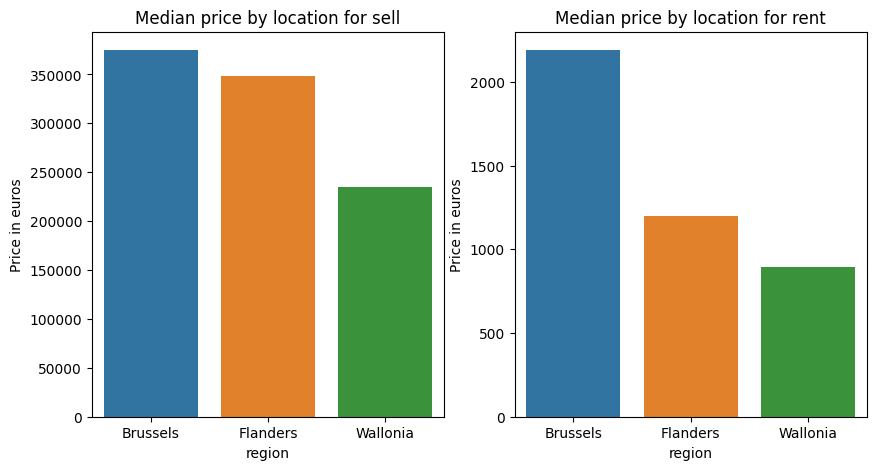

In [ ]:
  # Plot the median price by funished with sns in subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.barplot(x=median_prices_to_sell.index,
                y=median_prices_to_sell.values, ax=ax[0])
sns.barplot(x=median_prices_to_rent.index,
                y=median_prices_to_rent.values, ax=ax[1])
# set y axis label
ax[0].set_ylabel('Price in euros')
ax[1].set_ylabel('Price in euros')
    # set x axis label
ax[0].set_xlabel('region')
ax[1].set_xlabel('region')
    # set title
ax[0].set_title('Median price by location for sell')
ax[1].set_title('Median price by location for rent')
plt.show()

In [ ]:
## graph based on the furniture
# Calculate the median price by funished
median_prices_to_sell = data_to_sell.groupby('region')['Price'].median()
median_prices_to_rent = data_to_rent.groupby('region')['Price'].median()

In [ ]:
# Separate the data into to rent and to sell
data_to_sell = data[data['To sell'] == True]
data_to_rent = data[data['To sell'] == False]

In [ ]:
median_prices_to_sell = data_to_sell.groupby('Furnished')['Price'].median()
median_prices_to_rent = data_to_rent.groupby('Furnished')['Price'].median()


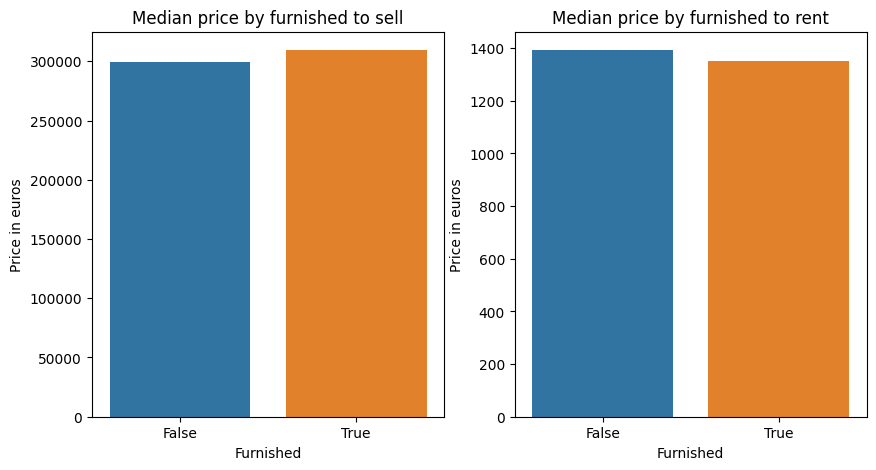

In [ ]:
 # Plot the median price by funished with sns in subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.barplot(x=median_prices_to_sell.index,
                y=median_prices_to_sell.values, ax=ax[0])
sns.barplot(x=median_prices_to_rent.index,
                y=median_prices_to_rent.values, ax=ax[1])
    # set y axis label
ax[0].set_ylabel('Price in euros')
ax[1].set_ylabel('Price in euros')
    # set x axis label
ax[0].set_xlabel('Furnished')
ax[1].set_xlabel('Furnished')
    # set title
ax[0].set_title('Median price by furnished to sell')
ax[1].set_title('Median price by furnished to rent')
plt.show()